# Moving Average

In [11]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm

# 1. Get the Data

In [17]:
df = pd.read_csv('21 RetailNZTS4.csv')

def fun_date (x):
    y = x[:4]
    m = x[5:]
    d = datetime.strptime("{0} {1} {2} 00:00:00".format(y,m,'01'), "%Y %m %d %H:%M:%S")
    return d
df['obsdate'] = df['Time'].apply(fun_date)

df.index= df['obsdate']
df.drop(['Time','obsdate'],axis=1,inplace=True)
df.head()

,Rec_goods,Clothing,Footwear,Chemist
obsdate,,,,
1995-05-01,103.2,138.2,24.6,85.4
1995-06-01,95.9,119.6,20.6,89.9
1995-07-01,98.0,121.1,20.2,84.1
1995-08-01,101.2,111.0,16.6,91.1
1995-09-01,103.6,109.4,17.7,87.7


# 2. Simple Moving Average

In [19]:
df['06m-SMA']=df['Rec_goods'].rolling(window=6).mean()
df['12m-SMA']=df['Rec_goods'].rolling(window=12).mean()
df['24m-SMA']=df['Rec_goods'].rolling(window=24).mean()

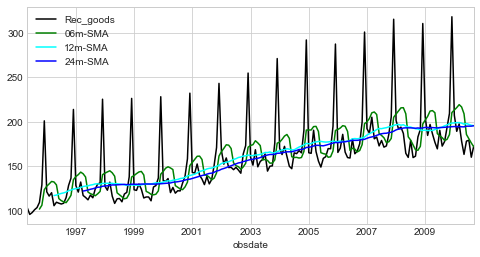

In [23]:
df['Rec_goods'].plot(color='black', figsize=(8,4),label='Rec_goods')
df['06m-SMA'].plot(color='green',label='06m-SMA')
df['12m-SMA'].plot(color='cyan',label='12m-SMA')
df['24m-SMA'].plot(color='blue',label='24m-SMA')
plt.legend()

# 3. Exponentially Weighted Moving Average

In [24]:
df['06m-EWMA']=df['Rec_goods'].ewm(span=6).mean()
df['12m-EWMA']=df['Rec_goods'].ewm(span=12).mean()
df['24m-EWMA']=df['Rec_goods'].ewm(span=24).mean()

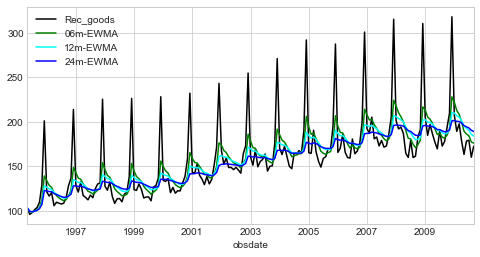

In [26]:
df['Rec_goods'].plot(color='black', figsize=(8,4),label='Rec_goods')
df['06m-EWMA'].plot(color='green',label='06m-EWMA')
df['12m-EWMA'].plot(color='cyan',label='12m-EWMA')
df['24m-EWMA'].plot(color='blue',label='24m-EWMA')
plt.legend()